<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Data-preperation" data-toc-modified-id="Data-preperation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data preperation</a></span></li><li><span><a href="#Benchmark-model" data-toc-modified-id="Benchmark-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Benchmark model</a></span><ul class="toc-item"><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Train-test-split</a></span></li><li><span><a href="#Fit-a-model-to-the-data" data-toc-modified-id="Fit-a-model-to-the-data-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Fit a model to the data</a></span></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Model evaluation</a></span></li><li><span><a href="#Fix-problems" data-toc-modified-id="Fix-problems-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Fix problems</a></span></li></ul></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Model-training" data-toc-modified-id="Model-training-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model training</a></span><ul class="toc-item"><li><span><a href="#Decision-tree" data-toc-modified-id="Decision-tree-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Decision tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Gradient-boosting" data-toc-modified-id="Gradient-boosting-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Gradient boosting</a></span></li><li><span><a href="#Comparing-algorithm-performances" data-toc-modified-id="Comparing-algorithm-performances-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Comparing algorithm performances</a></span></li></ul></li><li><span><a href="#Tuning" data-toc-modified-id="Tuning-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Tuning</a></span><ul class="toc-item"><li><span><a href="#Find-the-best-parameters" data-toc-modified-id="Find-the-best-parameters-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Find the best parameters</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Classification</a></span></li></ul></li></ul></div>

# Import libraries

In [45]:
import pandas as pd
import numpy as np

%matplotlib inline

# Import data

In [46]:
taxi_df = pd.read_csv('data/yellow_tripdata_2019-01.csv')

In [47]:
pd.set_option('display.max_columns', None)
taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [48]:
taxi_df.shape

(7667792, 18)

# Data exploration

In [49]:
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [50]:
taxi_df = taxi_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                  'passenger_count', 'trip_distance', 'RatecodeID', 
                  'PULocationID', 'payment_type', 'total_amount']]
taxi_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,2,55.55


array([[<AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'trip_distance'}>],
       [<AxesSubplot:title={'center':'RatecodeID'}>,
        <AxesSubplot:title={'center':'PULocationID'}>],
       [<AxesSubplot:title={'center':'payment_type'}>,
        <AxesSubplot:title={'center':'total_amount'}>]], dtype=object)

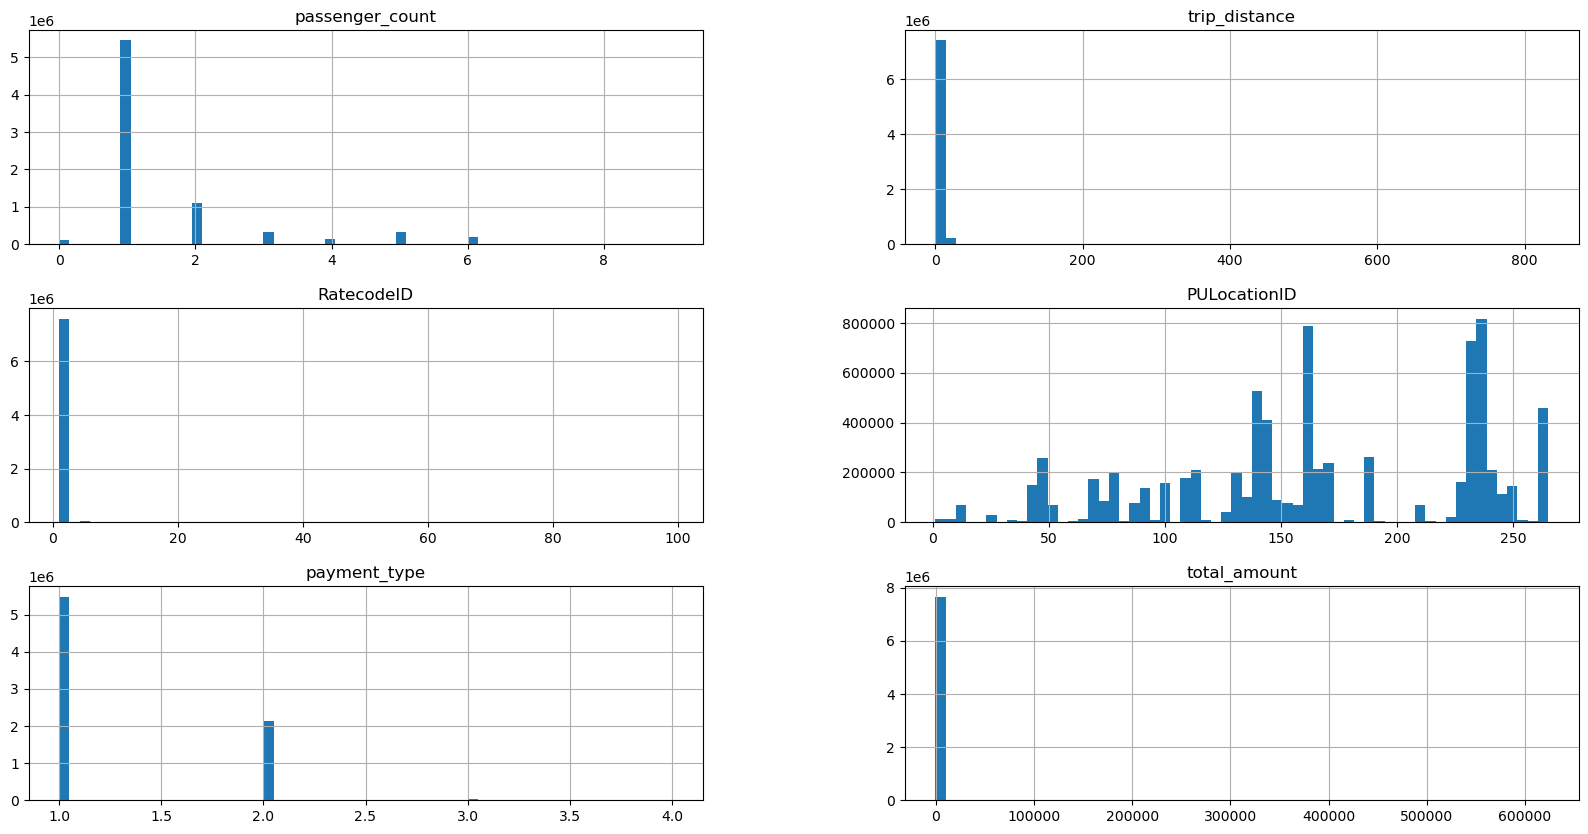

In [51]:
taxi_df.hist(figsize = (20,10), bins = 60)

In [52]:
taxi_df['RatecodeID'].value_counts()

1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: RatecodeID, dtype: int64

<AxesSubplot:xlabel='index', ylabel='total_amount'>

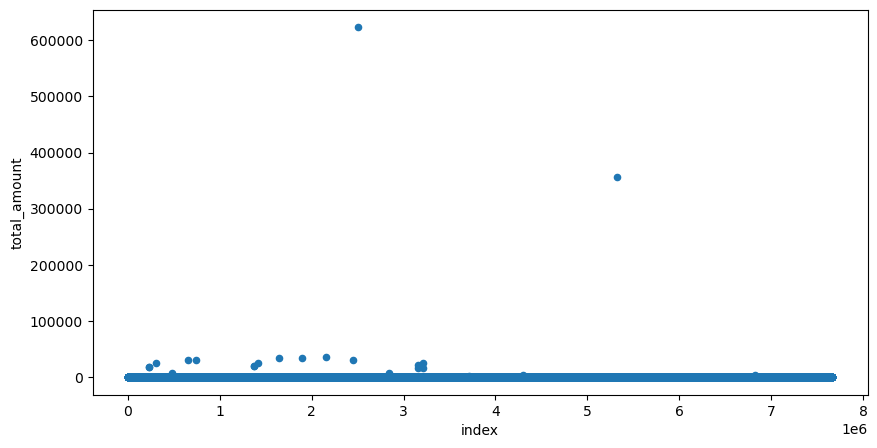

In [53]:
taxi_df.reset_index().plot(kind = 'scatter', y = 'total_amount', x = 'index', figsize = (10, 5))

<AxesSubplot:xlabel='index', ylabel='total_amount'>

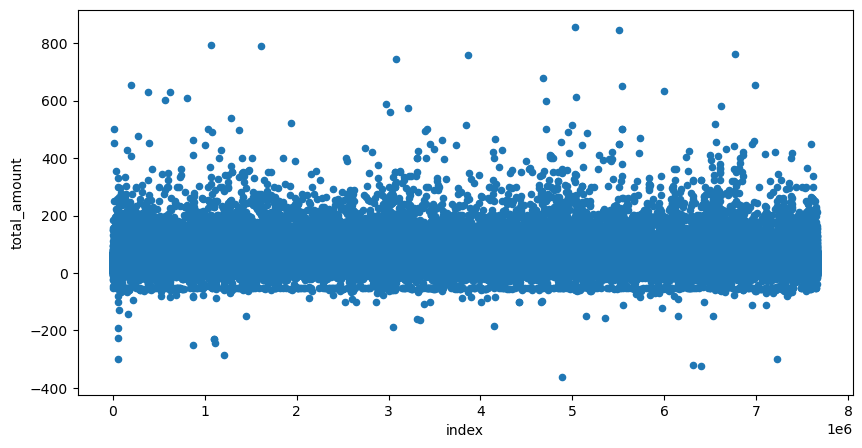

In [54]:
taxi_df[taxi_df['total_amount']<1000].reset_index().plot(kind = 'scatter', y = 'total_amount', x = 'index', figsize = (10, 5))

(7131, 8)


<AxesSubplot:xlabel='index', ylabel='total_amount'>

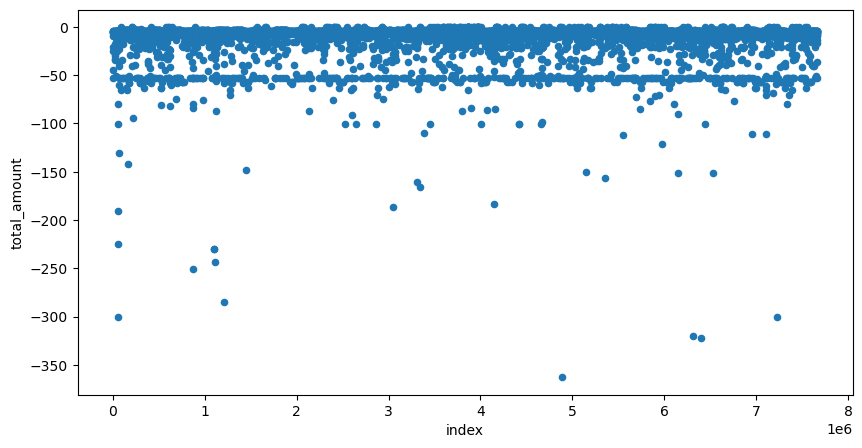

In [55]:
print(taxi_df[taxi_df['total_amount']<0].shape)
taxi_df[taxi_df['total_amount']<0].reset_index().plot(kind = 'scatter', y = 'total_amount', x = 'index', figsize = (10, 5))

In [56]:
taxi_df[taxi_df['total_amount'] < 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,4,-4.3


In [57]:
taxi_df[taxi_df['total_amount'] < 0]['payment_type'].value_counts()

3    4088
4    2666
2     376
1       1
Name: payment_type, dtype: int64

In [58]:
print(taxi_df[taxi_df['total_amount'] == 0].shape)

(1414, 8)


In [59]:
taxi_df[taxi_df['total_amount'] == 0]['payment_type'].value_counts()

1    815
2    569
3     29
4      1
Name: payment_type, dtype: int64

In [60]:
taxi_df[taxi_df['total_amount'] == 0]['trip_distance'].value_counts() #can remove all zero values

0.00     1270
1.00        4
0.02        4
0.01        4
0.10        3
         ... 
0.59        1
10.84       1
2.91        1
1.20        1
0.53        1
Name: trip_distance, Length: 110, dtype: int64

<AxesSubplot:xlabel='index', ylabel='total_amount'>

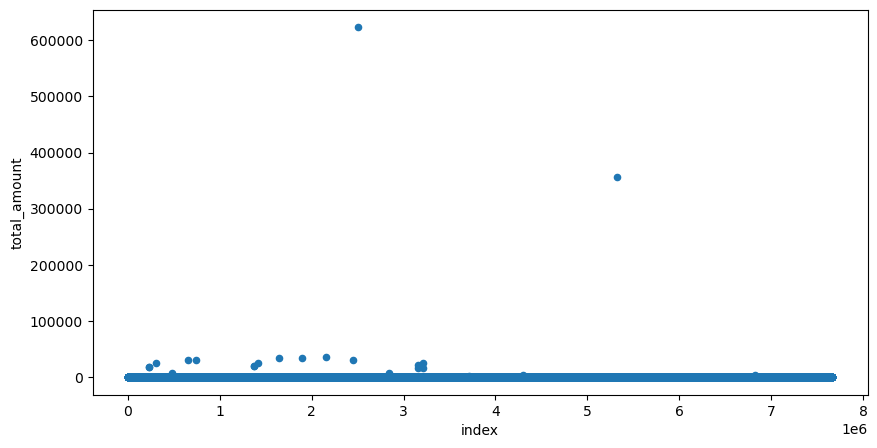

In [61]:
taxi_df.reset_index().plot(kind = 'scatter', y = 'total_amount', x = 'index', figsize = (10,5))

In [62]:
taxi_df[taxi_df['total_amount'] > 500].shape

(56, 8)

In [63]:
taxi_df[taxi_df['total_amount'] > 300].shape

(307, 8)

In [64]:
taxi_df[taxi_df['total_amount'] > 200].shape #good cut off point, limit data to entries with 0 < total_value <= 200

(1166, 8)

In [65]:
taxi_df[taxi_df['total_amount'] > 100].shape #to many values missing

(10832, 8)

In [67]:
taxi_df['total_amount'].mean()
taxi_df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,151,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,239,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,193,2,55.55
...,...,...,...,...,...,...,...,...
7667787,2019-01-31 23:57:36,2019-02-01 00:18:39,1,4.79,1,263,1,23.16
7667788,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,193,1,0.00
7667789,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,264,1,0.00
7667790,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,264,1,0.00


In [68]:
taxi_df.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
payment_type             0
total_amount             0
dtype: int64

# Data cleaning

<AxesSubplot:>

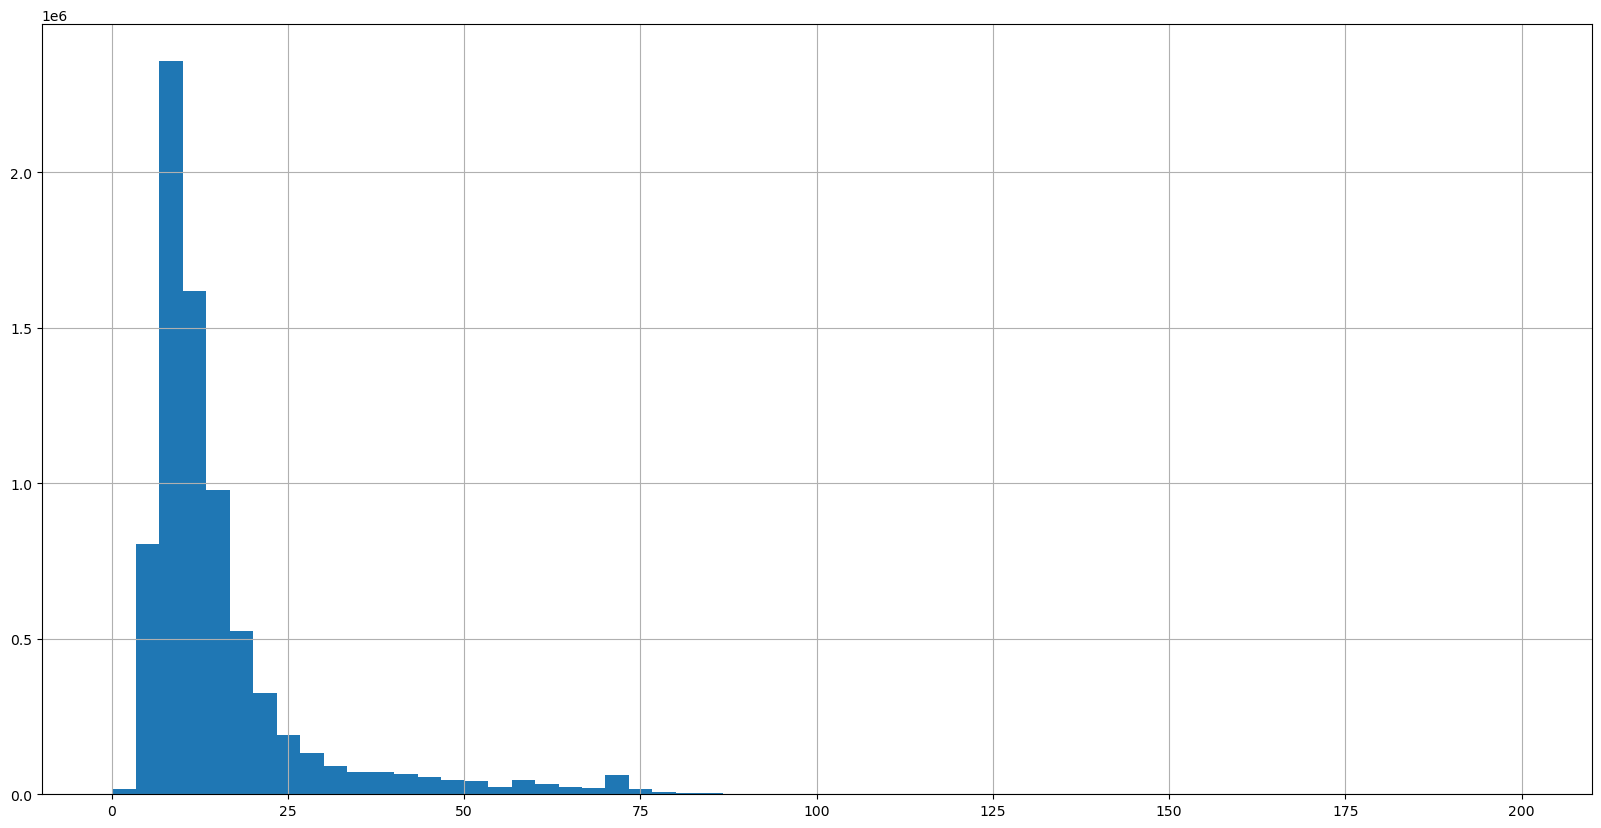

In [75]:
taxi_df = taxi_df.loc[taxi_df['total_amount'] > 0]
taxi_df = taxi_df.loc[taxi_df['total_amount'] < 200]
taxi_df['total_amount'].hist(figsize = (20,10), bins = 60)

# Data preperation

# Benchmark model

## Train-test-split

## Fit a model to the data 

## Model evaluation

## Fix problems

# Feature engineering

# Model training

## Decision tree

## Random Forest

## Gradient boosting

## Comparing algorithm performances

# Tuning

## Find the best parameters

## Classification